# WP8 lecture on vibrational analysis and spectroscopy
---

## General Setup

### Module imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# For reading and writing files and directories
import os
import sys
from pathlib import Path

# Plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
style.use('default')                # needed for vscode dark theme to see the axis

# Fitting and peak finding
from lmfit.models import LinearModel
from scipy.signal import savgol_filter, find_peaks  # for peak detection

### Figure settings

In [2]:
# define which figure format to use
from tkinter.font import families


save_as_pdf = 1
save_as_png = 1

# uncomment the following line to use LaTeX fonts in the plots         
# mpl.rc('text', usetex=True)           # needed for latex
# mpl.rc('pgf', texsystem='pdflatex')   # change this if using xetex or luatex
# mpl.rc('pgf', preamble="\n".join([    # load additional packages
#        r"\usepackage[utf8x]{inputenc}",
#        r"\usepackage[T1]{fontenc}",
#        r"\usepackage{amsmath,amsfonts,amsthm,amssymb,amstext}",
#        ]))
# mpl.rcParams['font.family'] = 'serif' # use serif/main font for text elements
mpl.rc('pgf', rcfonts=True)           # setup fonts from rc parameters
mpl.rc('font', size=8 )               # set font size
mpl.rc('axes', titlesize=12)          # fontsize of the axes title
mpl.rc('axes', titlepad=2)            # pad between axis and title
mpl.rc('axes', labelsize=12)          # fontsize of the x and y labels
mpl.rc('xtick', labelsize=9)          # fontsize of the tick labels
mpl.rc('ytick', labelsize=9)          # fontsize of the tick labels
mpl.rc('legend', fontsize=8)          # legend fontsize
mpl.rc('figure', titlesize=10)        # fontsize of the figure title
mpl.rc('lines', markersize=2)         # default line markersize
mpl.rc('lines', marker="")            # default line marker
mpl.rc('grid', alpha=0.4)             # transparency of the grid
mpl.rc('grid', color="gray")          # color of the grid
mpl.rc('grid', linewidth=0.5)         # linewidth of the grid
mpl.rcParams['figure.constrained_layout.use'] = True
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["k", "r", "b", "g", "orange", "purple", "dimgray"]) # matplotlib colororder-default ändern
mpl.rcParams['lines.linewidth'] = 1.0  # adjust default line width

# width and height of tex document in inches
# For Toms scrartcl
# fig_width = 6.69423

# For achemso Paper
# fig_width = 6.50128

# For Toms beamer
fig_width = 4.73726

# height is always the same
fig_height = fig_width * 0.6

### Useful Functions

In [3]:
# define a function to save the plot as png
def save_plot_as_png(fig, path):
    if save_as_png == 1:
        fig.savefig(path, format="png")
    
# define a function to save the plot as pdf
def save_plot_as_pdf(fig, path):
    if save_as_pdf == 1:
        fig.savefig(path, format="pdf")

# define a function that reads in a path and a regex and returns a list of files that match the regex
def getFileList(path, regex):
    filelist = []
    for file in sorted(Path(path).rglob(regex)):
        filelist.append(file)

    if len(filelist) == 0:
        sys.exit("No '*data' files found.")

    return filelist

# some useful constants
eh2kcal = 627.503 # kcal/mol
ev2kcal = 23.0609 # kcal/mol
eh2kj = 2625.5 # kj/mol
ev2kj = 96.4869 # kj/mol
eh2ev = 27.2107 # electronvolt
ev2eh = 0.0367502 # hartree
eh2j = 43.60E-19 # Joule
kb = 1.38064852E-23 # Boltzmann constant
na = 6.02214076E23 # Avogadro constant

## Some fancy figures

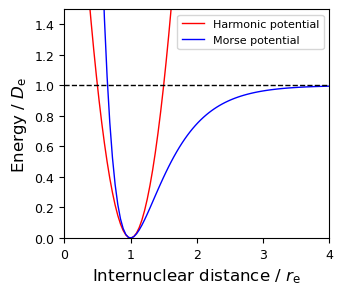

In [43]:
from turtle import color


fig = plt.figure(figsize=(0.7*fig_width, fig_height))

spec = fig.add_gridspec(1,1)
ax0 = fig.add_subplot(spec[0,0])

# array for x values of parabola with origin at (1,0)
xvals = np.linspace(0,4,100)
re = 1.0
alpha = 2.0

plt.plot(xvals, 4*(xvals-re)**2, label="Harmonic potential", color="r")
plt.plot(xvals, (1-np.exp(-alpha*(xvals-re)))**2 , label="Morse potential", color="b")
ax0.hlines(1, 0, 4, linestyles="dashed")

ax0.set_xlim(0,4)
ax0.set_ylim(0,1.5)
ax0.set_xlabel("Internuclear distance / $r_\mathrm{e}$")
ax0.set_ylabel("Energy / $D_\mathrm{e}$")
ax0.legend()

save_plot_as_pdf(fig, "potential.pdf")